<a href="https://colab.research.google.com/github/thallescotta/R_comander/blob/master/Aula_Pratica_MatPlotLib_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Visualização de dados**

**Na análise de dados, no Machine Learning, a representação visual dos dados é muito importante, seja para explorar os dados ou para gerar ideias para modelos, e ainda para comunicar os dados e resultados.**

**Vamos iniciar com a geração de gráficos nativos do Pandas. Em seguida falaremos da biblioteca de visualização Matplotlib. É uma biblioteca (pacote) de plotagem desktop, que cria gráficos com qualidade de publicação. Também é uma biblioteca base para alguns kits de visualização como o Seaborn. O Matplotlib fornece o controle dos detalhes das plotagens**

In [1]:
#Importando as bibliotecas Python
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Carregando uma base de dados
base = pd.read_csv('Diabetes.csv')

Variáveis:

npreg - número de gestações

glu - concentração de glicose no plasma em um teste de tolerância à glicose

glu_cat - categorização da variável glicose nas seguintes faixas: (0,99], (99-120], >120

bp - pressão sanguínea diastólica (mm Hg)

skin - espessura da dobra do tríceps (mm)

bmi - índice de massa corporal (kg/m2)

ped - diabetes pedigree function

age - idade em anos

type - diabética (Yes ou No), de acordo com o critério da OMS

In [3]:
#Inspecionando as carectarísticas do banco
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       332 non-null    int64  
 1   npreg    332 non-null    int64  
 2   glu      331 non-null    float64
 3   bp       332 non-null    int64  
 4   skin     332 non-null    int64  
 5   bmi      332 non-null    float64
 6   ped      332 non-null    float64
 7   age      330 non-null    float64
 8   type     332 non-null    object 
 9   glu_cat  332 non-null    object 
dtypes: float64(4), int64(4), object(2)
memory usage: 26.1+ KB


In [4]:
#Verificando os cinco primeiros registros do banco
base.head()

,id,npreg,glu,bp,skin,bmi,ped,age,type,glu_cat
0,1,6,148.0,72,35,33.6,627.0,NaN,Yes,>120
1,2,1,85.0,66,29,26.6,351.0,31.0,No,"(0,99]"
2,3,1,89.0,66,23,28.1,167.0,NaN,No,"(0,99]"
3,4,3,78.0,50,32,31.0,248.0,26.0,Yes,"(0,99]"
4,5,2,NaN,70,45,30.5,158.0,53.0,Yes,>120


In [5]:
#Total de dados faltantes por coluna
base.isnull().sum()

id         0
npreg      0
glu        1
bp         0
skin       0
bmi        0
ped        0
age        2
type       0
glu_cat    0
dtype: int64

In [6]:
base['age'].fillna(round(base['age'].mean()), inplace=True) #preencher com a médias dos valores
base['glu'].fillna(round(base['glu'].mean()), inplace=True) #preencher com a médias dos valores
base.isna().sum()

id         0
npreg      0
glu        0
bp         0
skin       0
bmi        0
ped        0
age        0
type       0
glu_cat    0
dtype: int64

In [7]:
base.head()

,id,npreg,glu,bp,skin,bmi,ped,age,type,glu_cat
0,1,6,148.0,72,35,33.6,627.0,31.0,Yes,>120
1,2,1,85.0,66,29,26.6,351.0,31.0,No,"(0,99]"
2,3,1,89.0,66,23,28.1,167.0,31.0,No,"(0,99]"
3,4,3,78.0,50,32,31.0,248.0,26.0,Yes,"(0,99]"
4,5,2,119.0,70,45,30.5,158.0,53.0,Yes,>120


In [8]:
#Resumindo as variáveis numéricas por medidas de posição, tendencia central e dispersão
base.describe()

,id,npreg,glu,bp,skin,bmi,ped,age
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,166.500000,3.484940,119.024096,71.653614,29.162651,33.239759,471.277048,31.289157
std,95.984374,3.283634,30.199428,12.799307,9.748068,7.282901,364.682708,10.571329
min,1.000000,0.000000,65.000000,24.000000,7.000000,19.400000,0.130000,21.000000
25%,83.750000,1.000000,96.000000,64.000000,22.000000,28.175000,227.500000,23.000000
50%,166.500000,2.000000,112.000000,72.000000,29.000000,32.900000,410.000000,27.000000
75%,249.250000,5.000000,136.000000,80.000000,36.000000,37.200000,652.500000,37.000000
max,332.000000,17.000000,197.000000,110.000000,63.000000,67.100000,2329.000000,81.000000


# **Gráficos nativos no Pandas**

<Axes: >

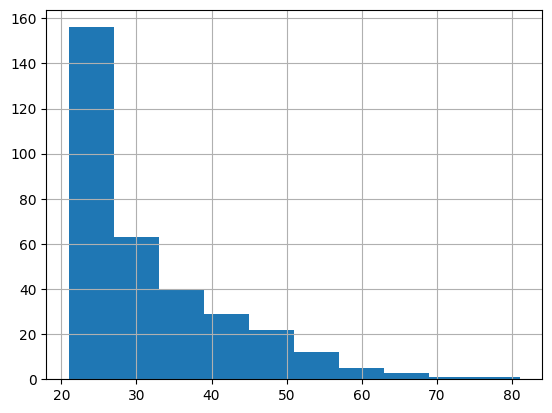

In [9]:
base['age'].hist() #Histograma

In [10]:
barras = pd.DataFrame(base['type'].value_counts())
barras

,type
No,223
Yes,109


<Axes: >

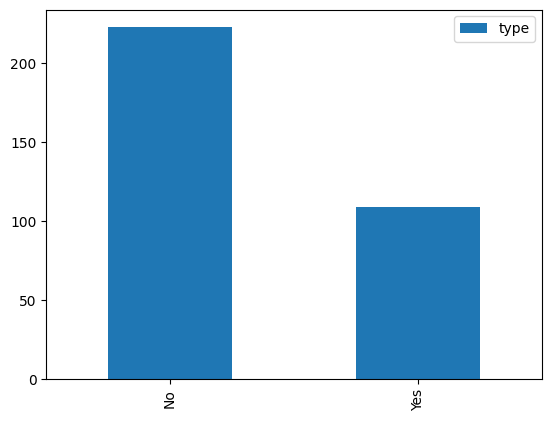

In [11]:
barras.plot.bar()

<Axes: >

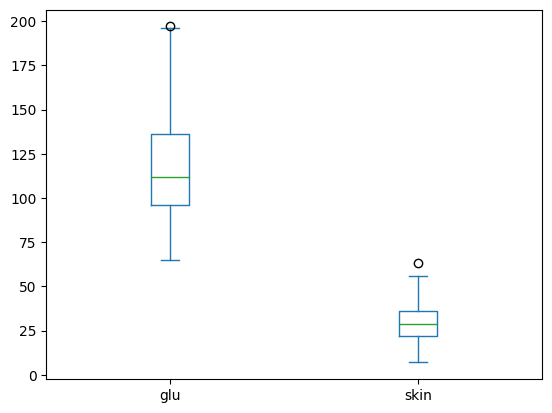

In [12]:
# Obtendo o boxplot das variáveis glu e skin
base[['glu', 'skin']].plot.box()

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'npreg'}>,
        <Axes: title={'center': 'glu'}>],
       [<Axes: title={'center': 'bp'}>, <Axes: title={'center': 'skin'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'ped'}>, <Axes: title={'center': 'age'}>,
        <Axes: >]], dtype=object)

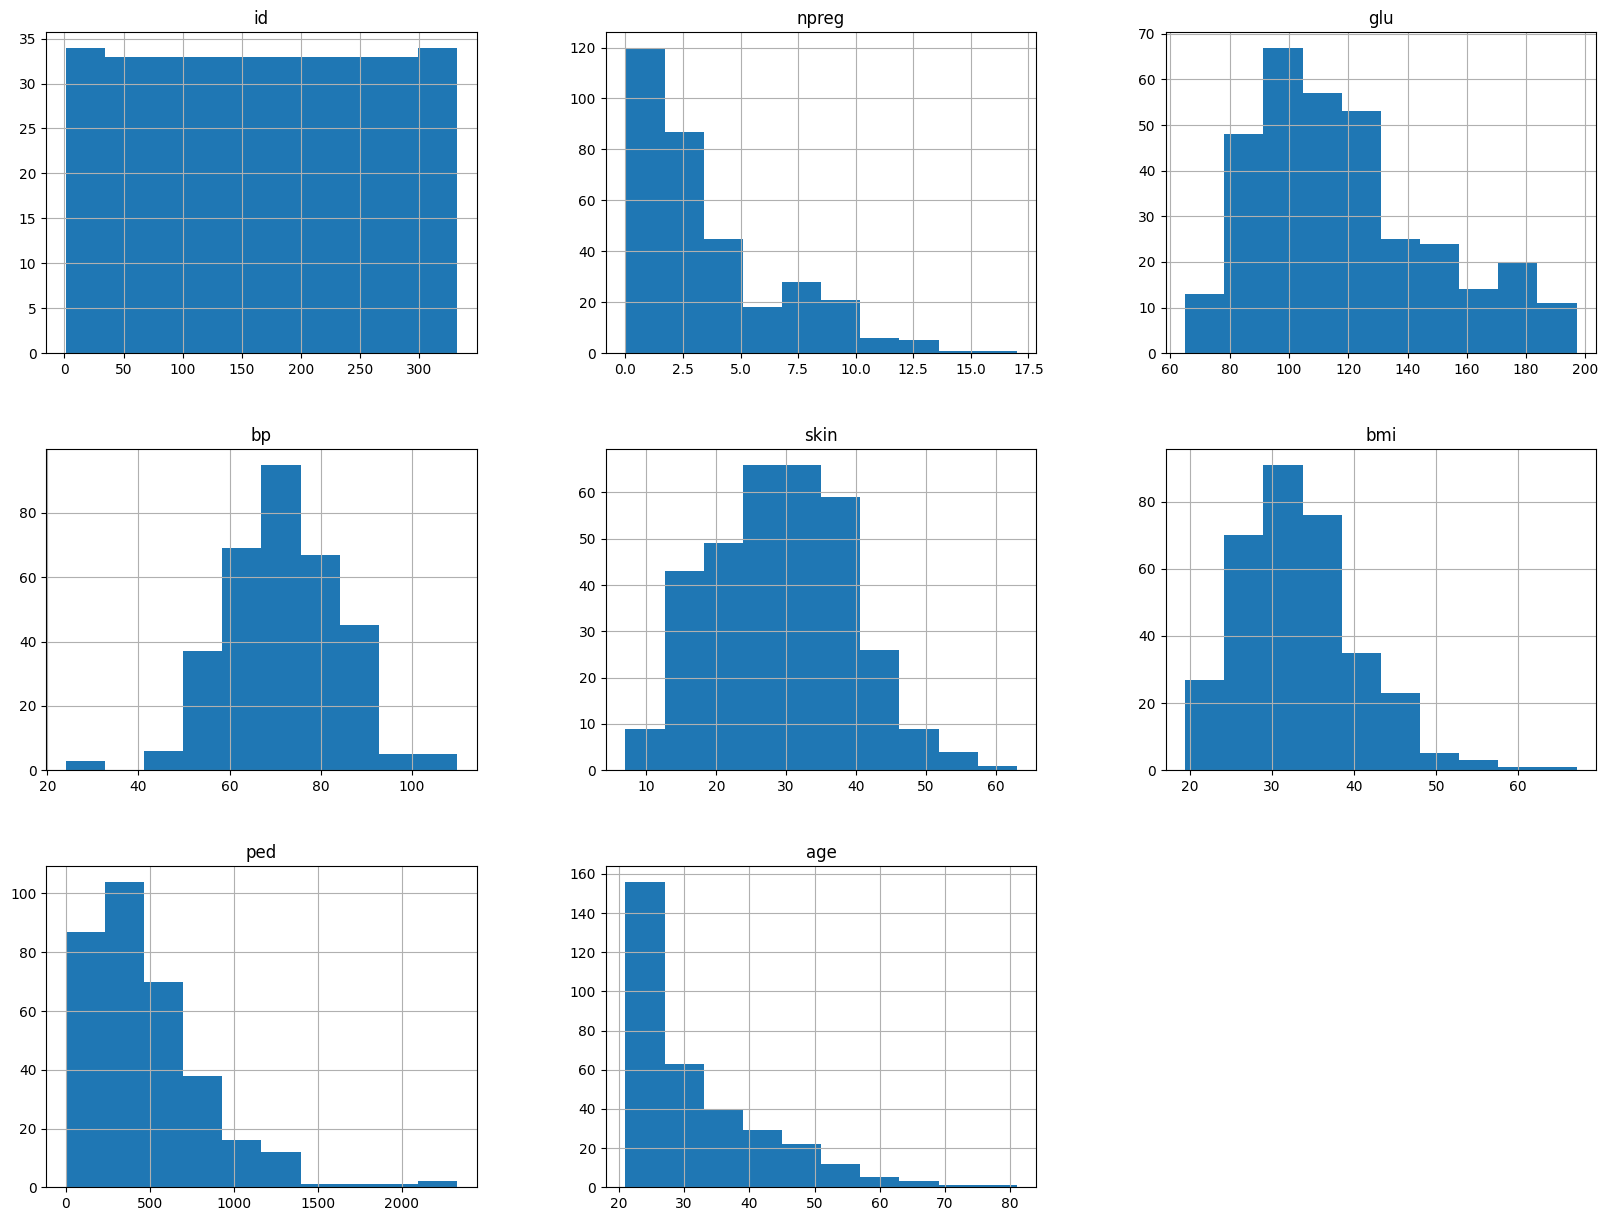

In [13]:
#Obtendo os histogramas das variáveis numéricas
base.hist(bins=10, figsize=(20,15))

In [14]:
import matplotlib.pyplot as plt #importando a biblioteca Matplotlib
%matplotlib inline

**Com o Matplotlib compomos uma plotagem com os seus elementos básicos: modo de exibição dos dados, legenda, título, ...**

Página Web: https://matplotlib.org/

In [15]:
glu = np.array(base['glu']) #convertendo para um numpy array
glu.sort() #ordenando os valores
glu

array([ 65.,  68.,  68.,  68.,  71.,  72.,  73.,  74.,  74.,  75.,  77.,
        78.,  78.,  80.,  80.,  81.,  81.,  81.,  81.,  81.,  82.,  82.,
        83.,  83.,  84.,  84.,  84.,  84.,  84.,  84.,  84.,  84.,  85.,
        85.,  87.,  87.,  87.,  87.,  88.,  88.,  88.,  88.,  88.,  88.,
        88.,  88.,  89.,  89.,  89.,  89.,  89.,  90.,  90.,  90.,  90.,
        90.,  90.,  90.,  91.,  91.,  91.,  92.,  92.,  93.,  93.,  93.,
        93.,  93.,  94.,  94.,  94.,  94.,  94.,  95.,  95.,  95.,  95.,
        95.,  95.,  95.,  96.,  96.,  96.,  96.,  97.,  97.,  97.,  97.,
        98.,  98.,  98.,  99.,  99.,  99.,  99.,  99.,  99.,  99.,  99.,
       100., 100., 100., 100., 100., 100., 100., 100., 101., 101., 101.,
       101., 101., 102., 102., 102., 102., 102., 102., 102., 103., 103.,
       103., 103., 103., 103., 104., 104., 104., 105., 105., 105., 105.,
       105., 106., 106., 106., 106., 106., 106., 107., 107., 107., 108.,
       108., 108., 108., 108., 108., 108., 108., 10

In [16]:
age = np.array(base['age'])
age.sort()
age

array([21., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21.,
       21., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21.,
       22., 22., 22., 22., 22., 22., 22., 22., 22., 22., 22., 22., 22.,
       22., 22., 22., 22., 22., 22., 22., 22., 22., 22., 22., 22., 22.,
       22., 22., 22., 22., 22., 22., 22., 22., 22., 22., 22., 22., 22.,
       22., 22., 23., 23., 23., 23., 23., 23., 23., 23., 23., 23., 23.,
       23., 23., 23., 23., 23., 23., 23., 23., 24., 24., 24., 24., 24.,
       24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
       24., 24., 24., 24., 24., 25., 25., 25., 25., 25., 25., 25., 25.,
       25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25.,
       25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 26., 26., 26.,
       26., 26., 26., 26., 26., 26., 26., 26., 26., 26., 26., 26., 26.,
       27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 28.,
       28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28

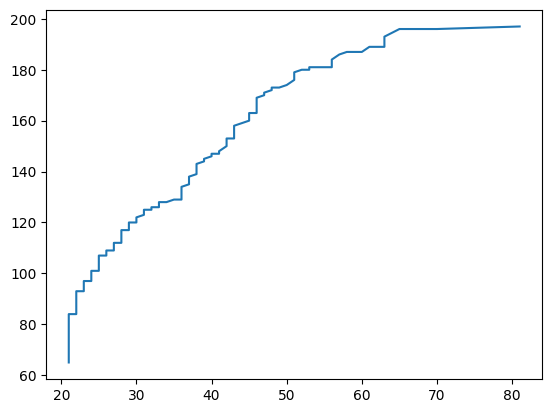

In [17]:
plt.plot(age,glu)
plt.show()

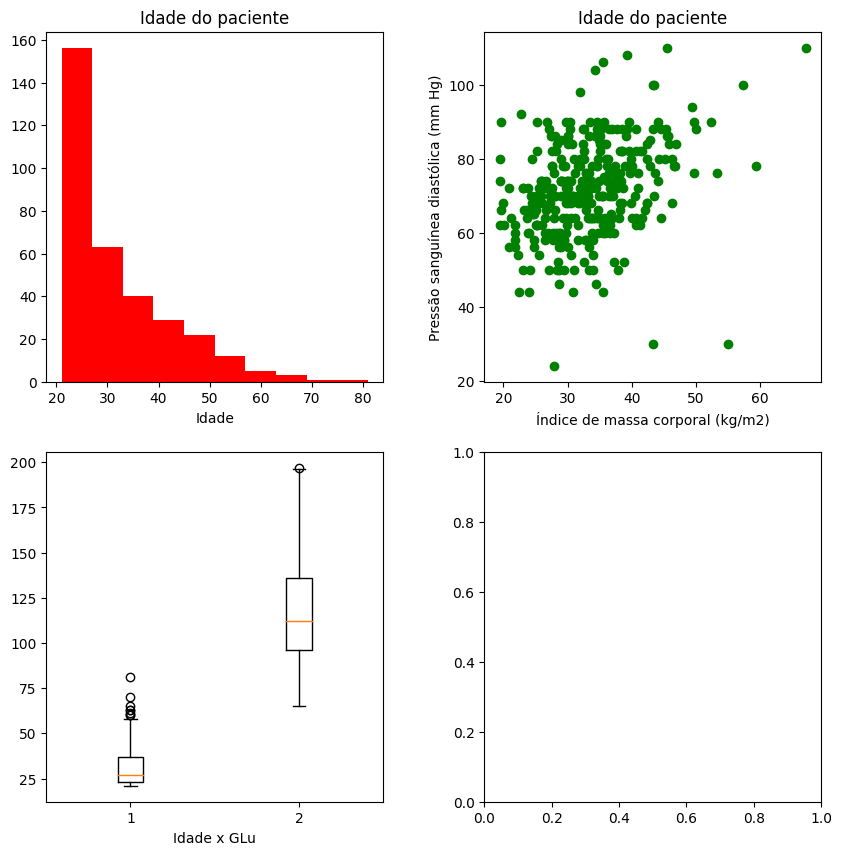

In [18]:
figura02, eixos = plt.subplots(nrows=2, ncols=2, figsize=(10,10)) #subplot gera dois objetos: figura02 e eixos
eixos[0][0].hist(base['age'], color='r')
eixos[0][0].set_xlabel('Idade')
eixos[0][0].set_title('Idade do paciente')
eixos[0][1].scatter(base['bmi'], base['bp'], color='g')
eixos[0][1].set_xlabel('Índice de massa corporal (kg/m2)')
eixos[0][1].set_ylabel('Pressão sanguínea diastólica (mm Hg)')
eixos[0][1].set_title('Idade do paciente')
eixos[1][0].boxplot([base['age'], base['glu']])
eixos[1][0].set_xlabel('Idade x GLu')
plt.subplots_adjust(wspace=0.3)


In [19]:
figura02.savefig('graficos.png')

**Seaborn é uma interface de alto nível para desenhar gráficos estatísticos com Matplotlib. O objetivo é tornar a visualização uma parte central da exploração e compreensão de conjuntos de dados complexos. O Seaborn é uma biblioteca construída sobre o Matplotlib. Funciona harmonicamente com os Series e DataFrames do Pandas, por isso é utilizado para visualização de dados estatísticos**

Página web: https://seaborn.pydata.org/

In [20]:
import seaborn as sns #importando a bilbioteca Seaborn

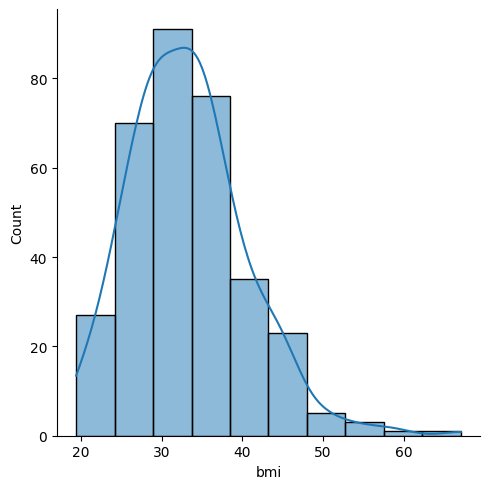

In [21]:
sns.displot(base['bmi'], kde='True', bins=10) #Histograma da variável bmi

<Axes: xlabel='bmi'>

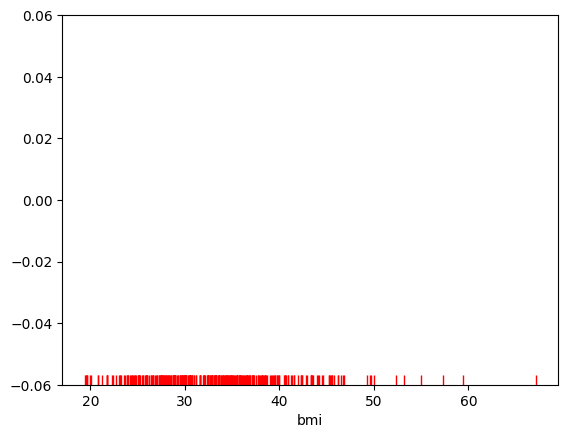

In [22]:
sns.rugplot(base['bmi'], color='r')

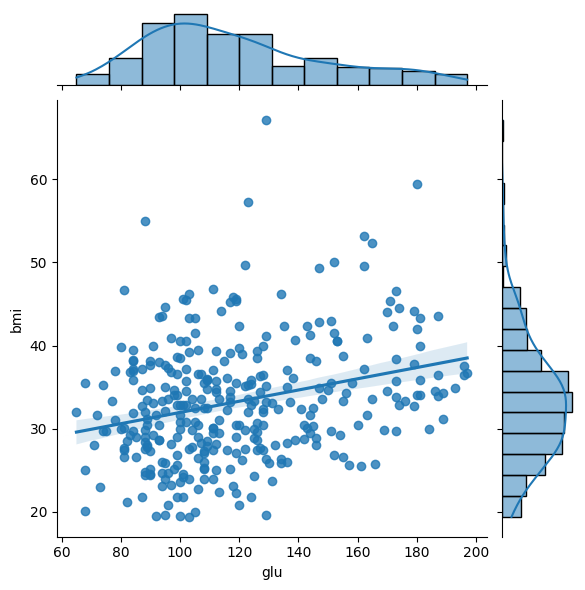

In [23]:
sns.jointplot(x='glu', y='bmi', data=base, kind='reg') #reg -> regressão linear

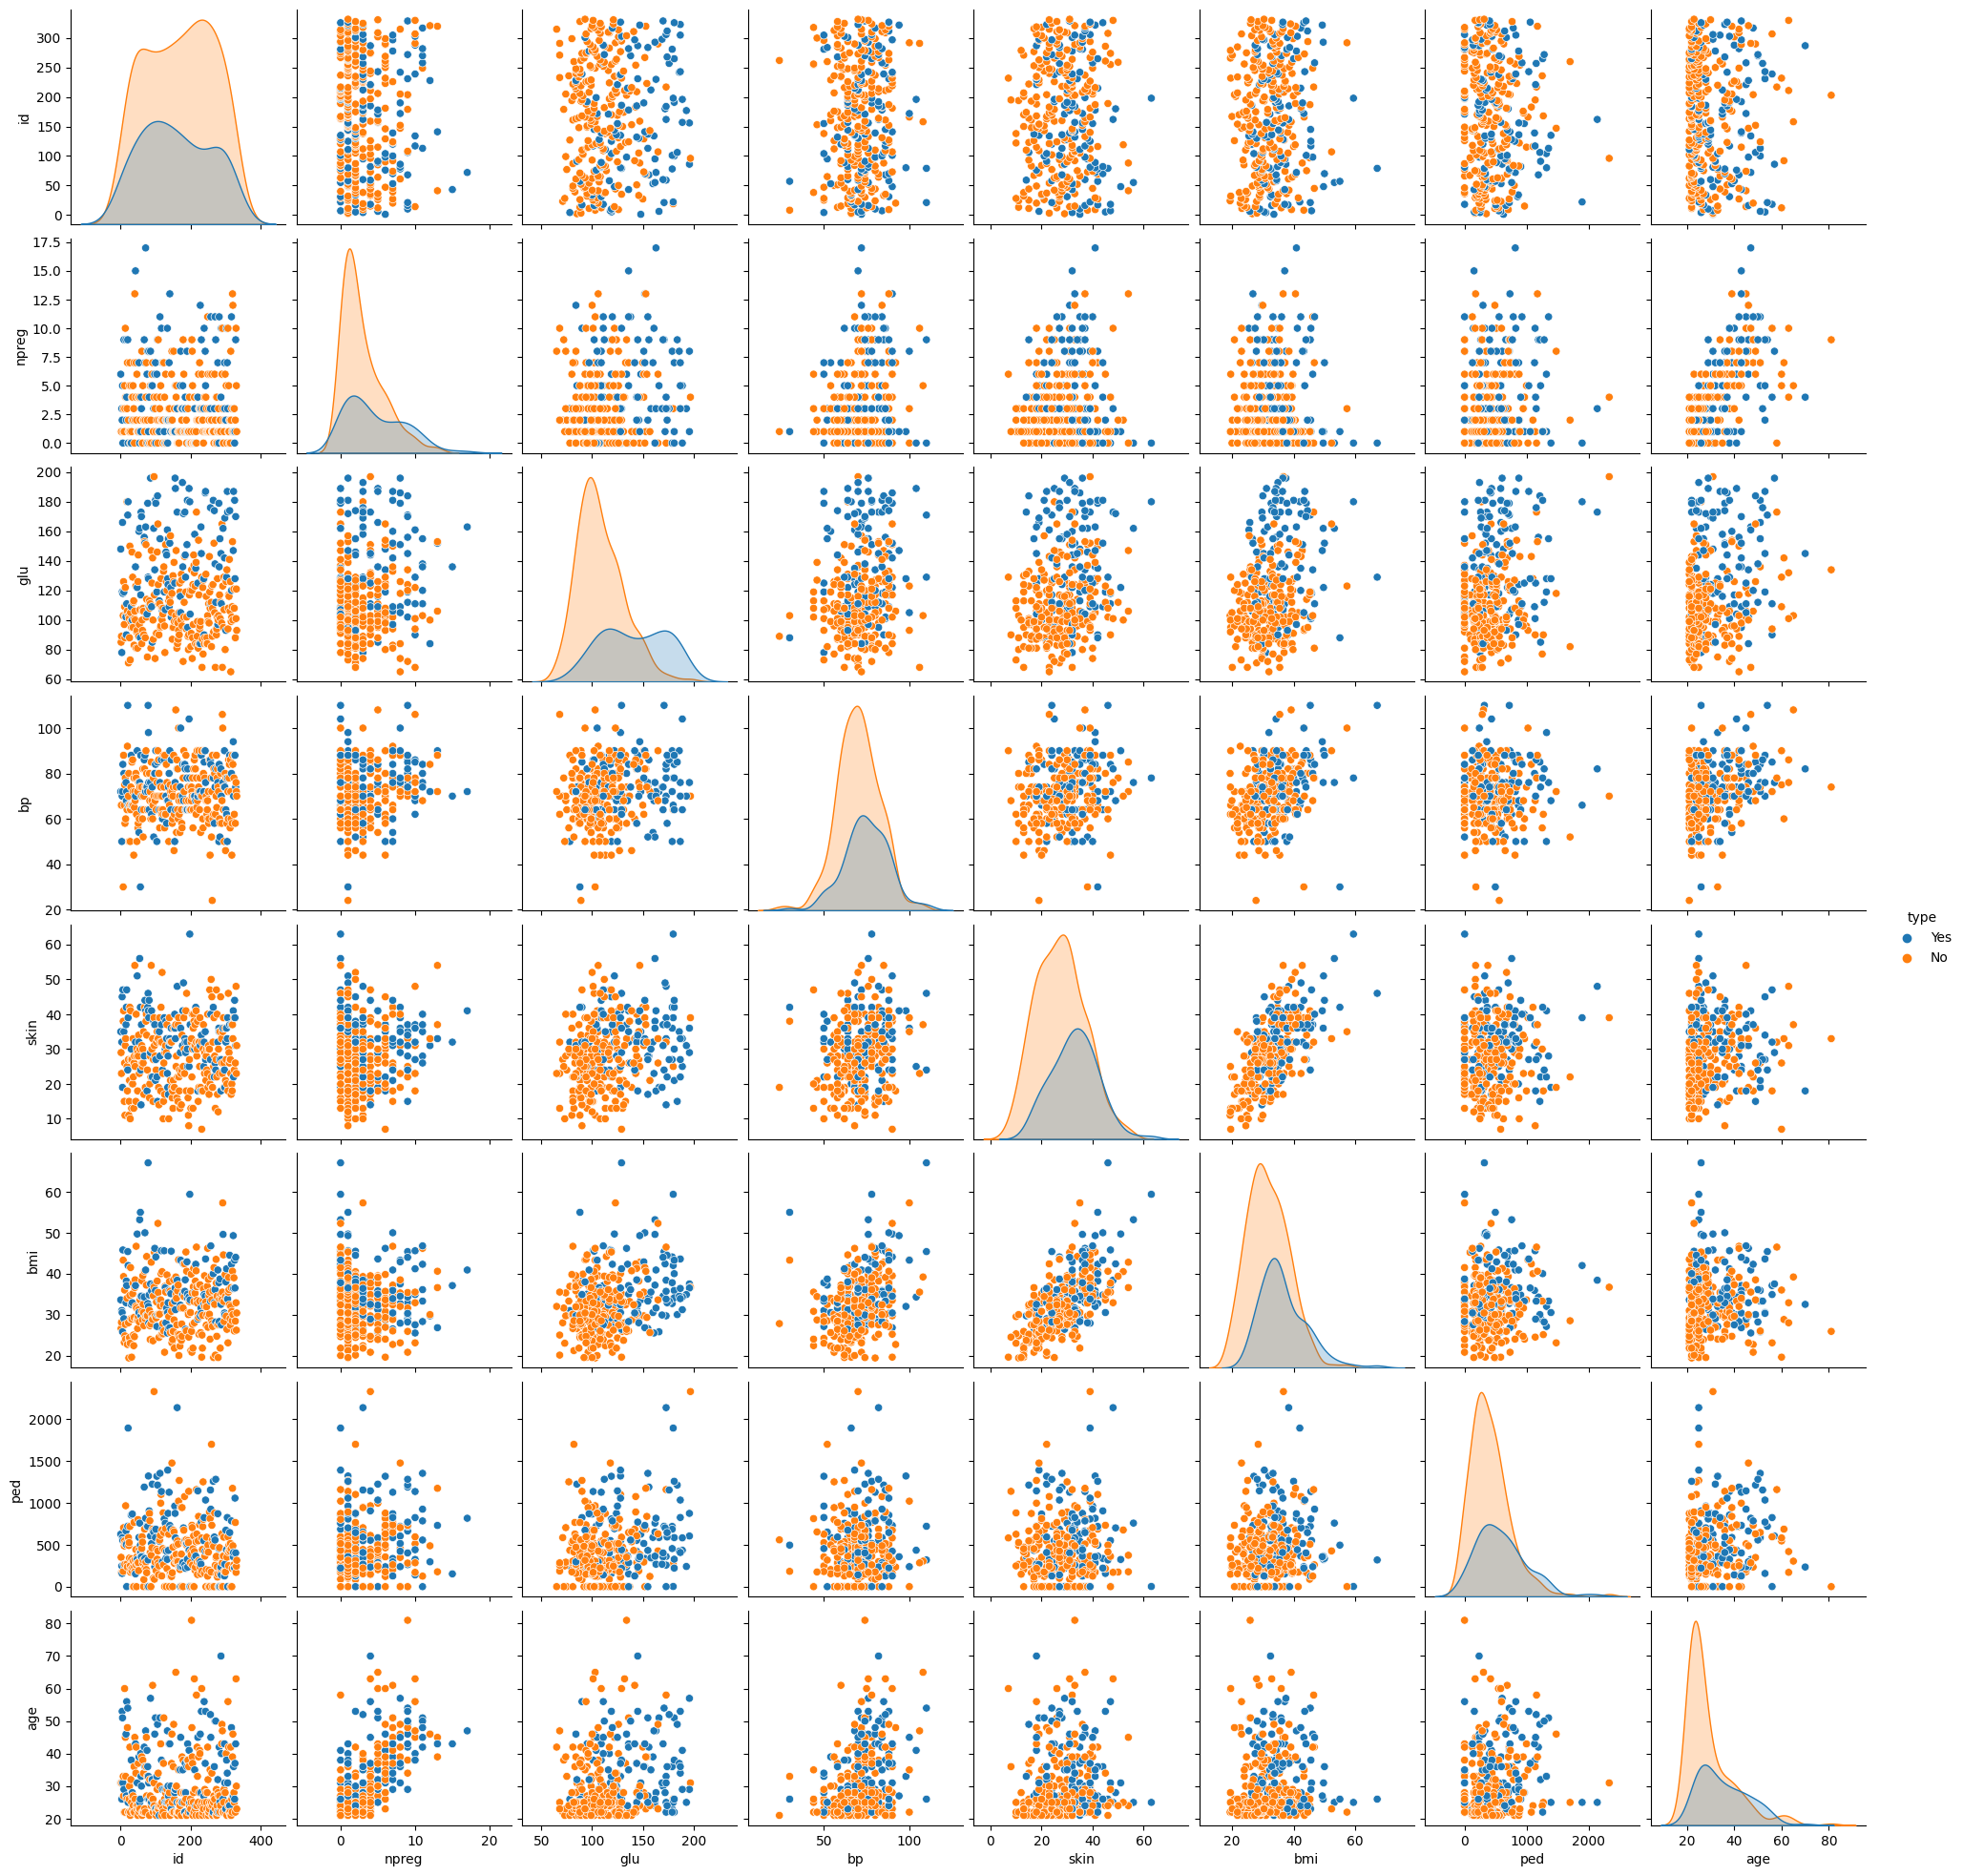

In [24]:
#Análise BI-VARIADAS entre as variáveis do estudo
sns.pairplot(base, hue='type')

<Axes: xlabel='glu_cat', ylabel='count'>

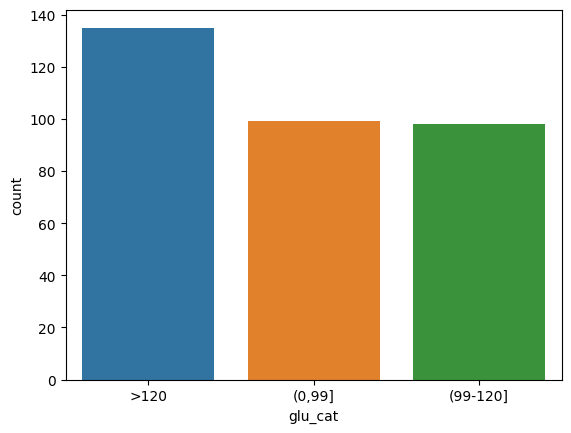

In [25]:
#Gráfico de barras para a variável glu_cat
sns.countplot(x='glu_cat', data=base )

<Axes: xlabel='type', ylabel='glu'>

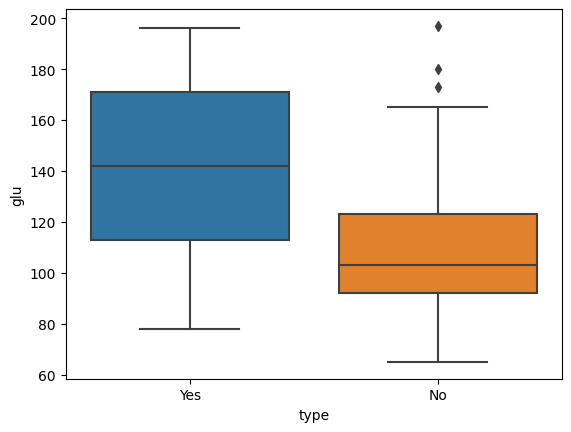

In [26]:
sns.boxplot(x='type', y='glu', data=base)

<Axes: xlabel='glu', ylabel='type'>

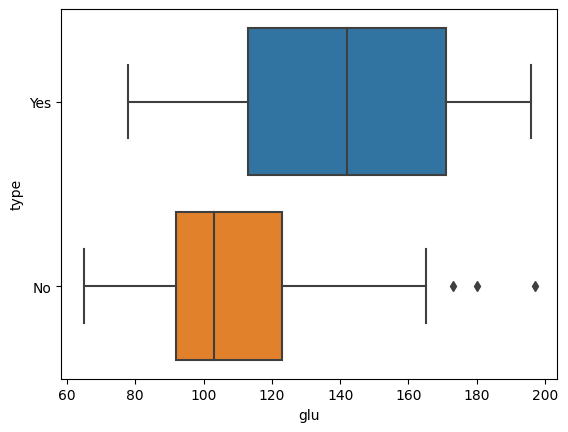

In [27]:
sns.boxplot(x='glu', y='type', data=base, orient='h')

<Axes: xlabel='type', ylabel='glu'>

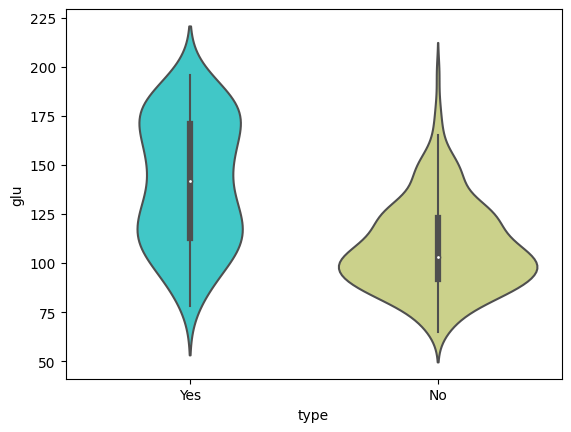

In [28]:
#Violin Plot de local de nascimento segundo a quantidade de consultas pré-natais
sns.violinplot(x="type", y="glu", data=base,palette='rainbow')


<Axes: xlabel='type', ylabel='glu'>

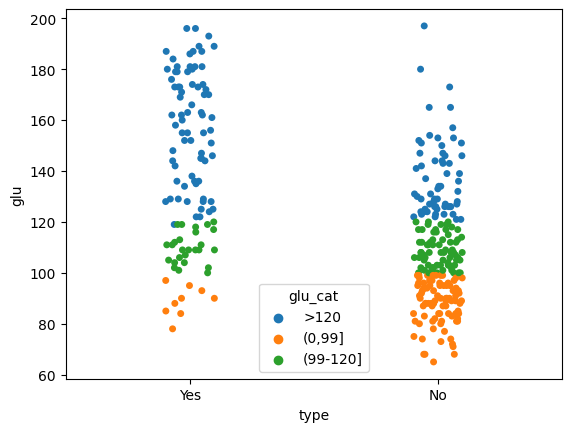

In [29]:
sns.stripplot(x='type', y='glu', data=base, hue='glu_cat')

<Axes: >

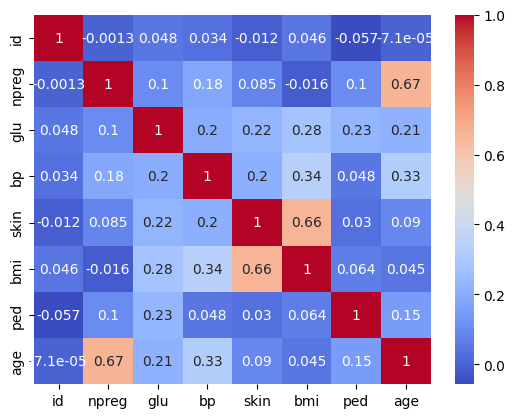

In [30]:
# construindo a matriz (mapa) de correlação
correlacoes = base.corr()
sns.heatmap(correlacoes, cmap='coolwarm', annot=True)

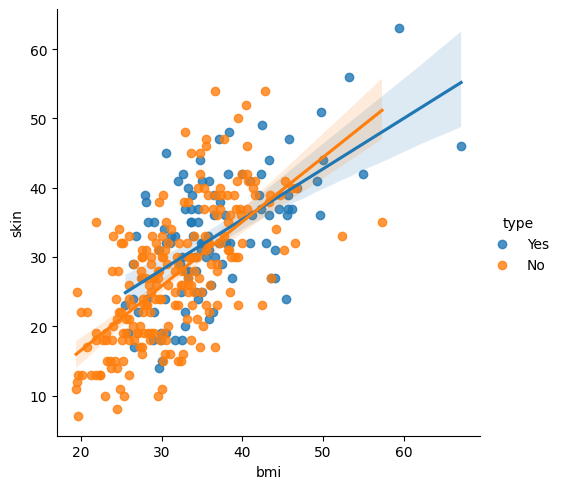

In [31]:
sns.lmplot(x='bmi', y='skin', data=base, hue='type')

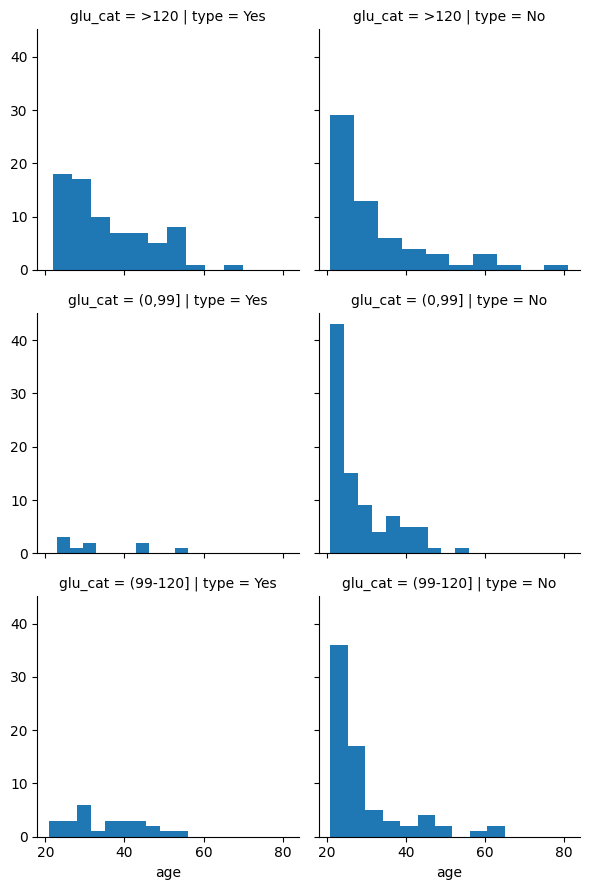

In [32]:
g = sns.FacetGrid(base, col='type', row='glu_cat')
g.map(plt.hist, 'age')